## Cursory Viewing of Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('../Final_app_work/categorized_data.csv')
data.head().T

,0,1,2,3,4
Unnamed: 0,1,2,4,5,7
site,AK,AK,AK,AK,AK
tree,1A,1A,1A,1A,1A
plot,1,1,1,1,1
species,P glauca,P glauca,P glauca,P glauca,P glauca
Date,2019-01-01,2019-02-01,2019-05-01,2019-06-01,2018-07-01
longitude,-149.71571,-149.71571,-149.71571,-149.71571,-149.71571
latitude,68.018576,68.018576,68.018576,68.018576,68.018576
da,1,1,1,1,1
mo,1,2,5,6,7


### growth cat

In [6]:
data['growth_category'].value_counts(normalize=True)

growth_category
Moderate Change     0.338931
Extreme Change      0.332698
No/Little Change    0.328371
Name: proportion, dtype: float64

In [7]:
data_test = data.copy()
data_test['growth_2'] = pd.cut(data_test['change_basal_area'], bins=[-0.5, 0, 0.07, 0.23, 1000], labels=['No Growth', 'Little Growth', 'Moderate Growth', 'Extreme Growth'])
data_test['growth_2'].value_counts(normalize=True)

growth_2
Moderate Growth    0.491750
Little Growth      0.257388
Extreme Growth     0.188018
No Growth          0.062844
Name: proportion, dtype: float64

### growth

857


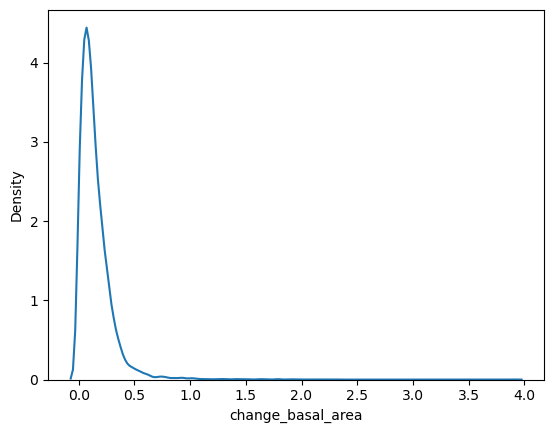

In [8]:
growing_data = data
# print count of zeroes
print(growing_data[growing_data['change_basal_area'] == 0]['change_basal_area'].count())

sns.kdeplot(data=growing_data, x='change_basal_area')
temp = data['change_basal_area']
eps = temp[temp > 0].min() * 0.5
x_log = np.log(temp + eps)
# sns.kdeplot(data=x_log)

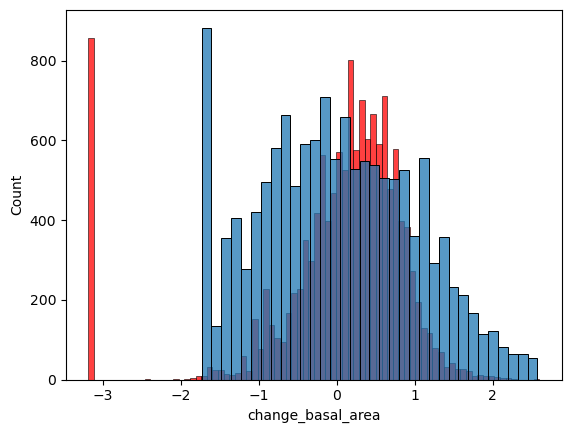

<Axes: ylabel='Density'>

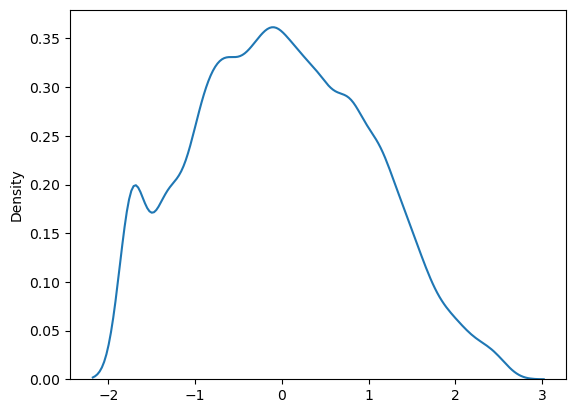

In [9]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
x_trans = pt.fit_transform(data['change_basal_area'].values.reshape(-1, 1))
x_trans = pd.Series(x_trans.flatten())

x_new = (x_log - x_log.mean()) / (x_log.std())
sns.histplot(data=x_new, color='red')
# sns.histplot(data=data, x='change_basal_area')
sns.histplot(data=list(x_trans))
plt.show()
sns.kdeplot(data=list(x_trans))

### growth by month

<Axes: xlabel='mo', ylabel='log_change_basal_area'>

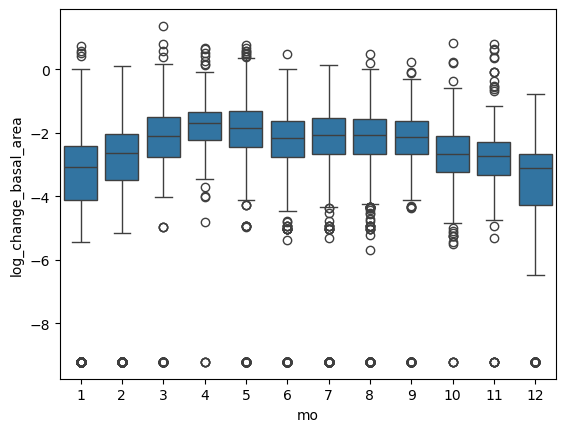

In [10]:
data_temp = data.copy()
data_temp['log_change_basal_area'] = np.log(data_temp['change_basal_area'] + 0.0001)
sns.boxplot(y='log_change_basal_area', x='mo', data=data_temp)

<Axes: xlabel='mo', ylabel='yeo_change_basal_area'>

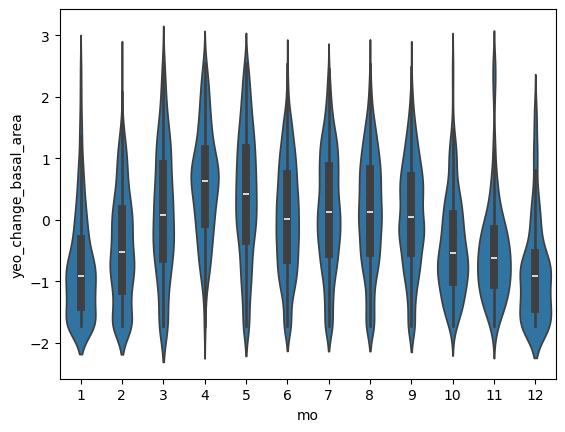

In [11]:
data_temp = data.copy()
data_temp['yeo_change_basal_area'] = x_trans
sns.violinplot(y='yeo_change_basal_area', x='mo', data=data_temp)

In [12]:
min(data.query('change_basal_area != 0')['change_basal_area'])

0.001430010614797

In [13]:
data_2 = data.copy()
data_2['zero_growth'] = data_2['change_basal_area'] == 0
data_2.groupby('mo').agg({'zero_growth': ['sum', 'count', 'mean'], 'change_basal_area': ['min', 'mean', 'max']})

zero_growth                 change_basal_area                    
           sum count      mean               min      mean       max
mo                                                                  
1          156   874  0.178490               0.0  0.077060  2.043100
2          126   928  0.135776               0.0  0.092986  1.096941
3           49   637  0.076923               0.0  0.177357  3.903743
4            4   470  0.008511               0.0  0.232359  1.923958
5           69  1609  0.042884               0.0  0.216477  2.108445
6           81  1986  0.040785               0.0  0.141798  1.601772
7          115  2467  0.046615               0.0  0.160600  1.142484
8          104  2121  0.049033               0.0  0.153659  1.609614
9           66  1389  0.047516               0.0  0.143639  1.266690
10           5   460  0.010870               0.0  0.100932  2.310371
11           7   350  0.020000               0.0  0.111029  2.237438
12          75   346  0.216763               0.0  0.061761  0.455828

### Growth by cat

<Axes: xlabel='growth_category', ylabel='change_basal_area'>

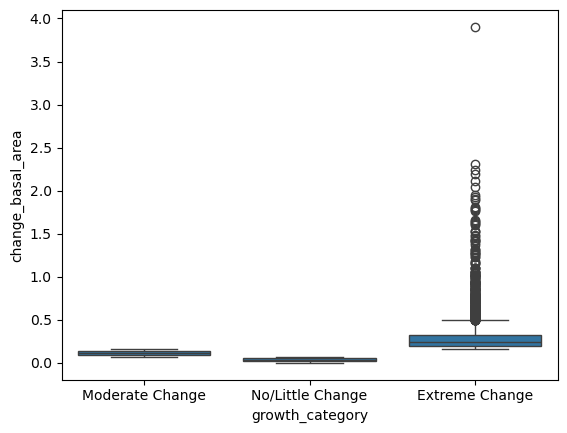

In [14]:
sns.boxplot(y='change_basal_area', x='growth_category', data=data_temp)

### Temp

<Axes: xlabel='mo', ylabel='average_air_temperature'>

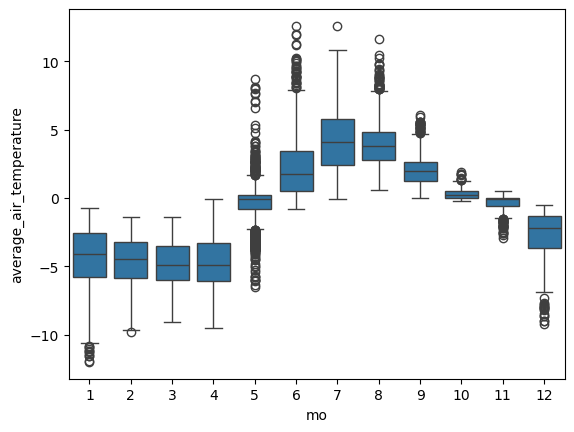

In [15]:
sns.boxplot(y='average_air_temperature', x='mo', data=data)

### ranges of key  inputs

In [16]:
key_factors = data.copy()[['change_basal_area','average_air_temperature','average_air_pressure','average_humidity','avg_solar_irradiance','avg_soil_water_content']]
key_factors.corr()

,change_basal_area,average_air_temperature,average_air_pressure,average_humidity,avg_solar_irradiance,avg_soil_water_content
change_basal_area,1.000000,0.027062,-0.031387,-0.064797,0.172036,0.023645
average_air_temperature,0.027062,1.000000,-0.296544,-0.238829,0.192541,0.729639
average_air_pressure,-0.031387,-0.296544,1.000000,0.407445,-0.097687,-0.129222
average_humidity,-0.064797,-0.238829,0.407445,1.000000,-0.385100,-0.103059
avg_solar_irradiance,0.172036,0.192541,-0.097687,-0.385100,1.000000,0.145628
avg_soil_water_content,0.023645,0.729639,-0.129222,-0.103059,0.145628,1.000000


In [17]:
key_factors.describe().T

,count,mean,std,min,25%,50%,75%,max
change_basal_area,13637.0,0.149156,0.160878,0.000000,0.054513,0.110173,0.198983,3.903743
average_air_temperature,13637.0,0.802599,3.753770,-11.990278,-1.418288,1.105700,3.432845,12.593482
average_air_pressure,13637.0,96.761753,3.665199,89.560170,93.167482,97.831217,100.231667,105.050725
average_humidity,13637.0,0.783601,0.150727,0.278074,0.679617,0.807082,0.901958,1.063439
avg_solar_irradiance,13637.0,54.781447,52.828178,0.000000,14.384588,39.923986,78.169505,273.265839
avg_soil_water_content,13637.0,0.270855,0.155570,0.039283,0.099994,0.306258,0.376487,0.678039


### tree inspection

In [18]:
temp = data.groupby(['tree', 'yr']).agg({'change_basal_area': ['count']}).reset_index()
temp.columns = ['tree', 'yr', 'count']
temp.pivot_table(index='tree', columns='yr', values='count')

yr,2017,2018,2019
tree,,,
1A,NaN,112.0,139.0
1B,64.0,155.0,144.0
1C,64.0,155.0,144.0
1D,64.0,179.0,134.0
1E,61.0,155.0,139.0
1F,NaN,142.0,143.0
201,12.0,231.0,NaN
202,30.0,159.0,67.0
203,11.0,233.0,67.0


In [19]:
data['tree'].value_counts()

tree
301    584
210    524
302    456
305    456
209    454
212    392
207    389
1D     377
1B     363
1C     363
1E     355
3D     338
3A     334
3F     333
304    317
203    311
1F     285
3C     283
308    278
311    278
202    256
1A     251
303    246
201    243
2E     238
206    231
312    231
211    227
4D     221
4A     221
4C     219
6F     208
6B     207
6A     204
6C     203
309    198
6D     197
205    190
3E     187
310    180
307    180
6E     176
204    166
4B     164
5E     147
5B     147
5A     147
2F     142
306    141
3B     119
2D     103
5C     103
5D      51
4E      16
2A       7
Name: count, dtype: int64

In [20]:
data['species'].value_counts()

species
P glauca     12240
P mariana     1397
Name: count, dtype: int64